In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [44]:
bs = 64

In [7]:
path=Path("../../datasets")
path

PosixPath('../../datasets')

In [8]:
path.ls()

[PosixPath('../../datasets/Kissing'),
 PosixPath('../../datasets/.ipynb_checkpoints'),
 PosixPath('../../datasets/Kicking'),
 PosixPath('../../datasets/Dining'),
 PosixPath('../../datasets/HighFive'),
 PosixPath('../../datasets/Partying'),
 PosixPath('../../datasets/Talking'),
 PosixPath('../../datasets/Hugging'),
 PosixPath('../../datasets/Boxing-Punching'),
 PosixPath('../../datasets/Handshaking'),
 PosixPath('../../datasets/Speech')]

In [11]:
path_kissing = path/'Kissing'
path_kicking = path/'Kicking'
path_dining = path/'Dining'
path_highfive = path/'HighFive'
path_partying = path/'Partying'
path_talking = path/'Talking'
path_hugging= path/'Hugging'
path_boxing_punching = path/'Boxing-Punching'
path_handshaking = path/'Handshaking'
path_Speech = path/'Speech'

In [12]:
fnames=get_image_files(path_kissing)
fnames[:5]

[PosixPath('../../datasets/Kissing/103.jpg'),
 PosixPath('../../datasets/Kissing/058.jpg'),
 PosixPath('../../datasets/Kissing/186.jpg'),
 PosixPath('../../datasets/Kissing/118.jpg'),
 PosixPath('../../datasets/Kissing/132.jpg')]

In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['Boxing-Punching',
 'Dining',
 'Handshaking',
 'HighFive',
 'Hugging',
 'Kicking',
 'Kissing',
 'Partying',
 'Speech',
 'Talking']

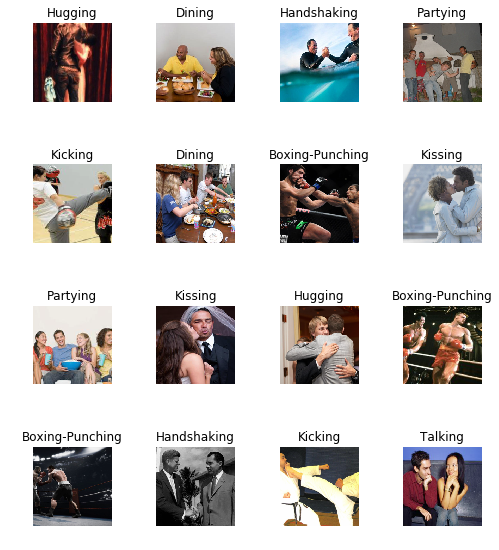

In [17]:
data.show_batch(rows=4, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Boxing-Punching',
  'Dining',
  'Handshaking',
  'HighFive',
  'Hugging',
  'Kicking',
  'Kissing',
  'Partying',
  'Speech',
  'Talking'],
 10,
 1578,
 394)

## Train model

In [21]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/stan_demontmarin/.torch/models/resnet50-19c8e357.pth
102502400it [00:05, 18815340.70it/s]


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.564670,0.876950,0.286802,00:17
1,1.092819,0.779623,0.279188,00:15
2,0.840642,0.661984,0.241117,00:16
3,0.672881,0.650828,0.230964,00:15


In [23]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [24]:
learn.save('test-1')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

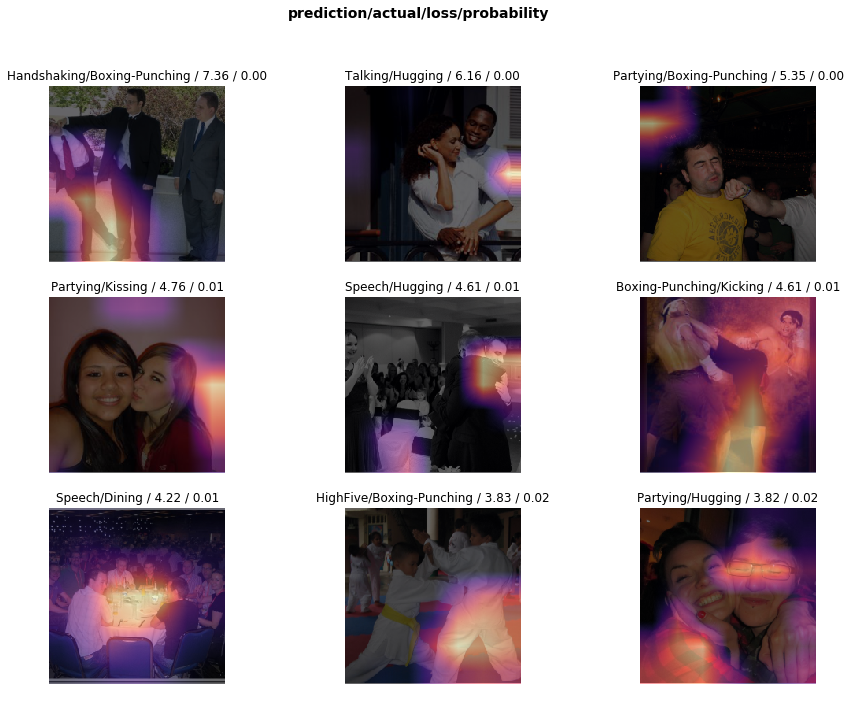

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

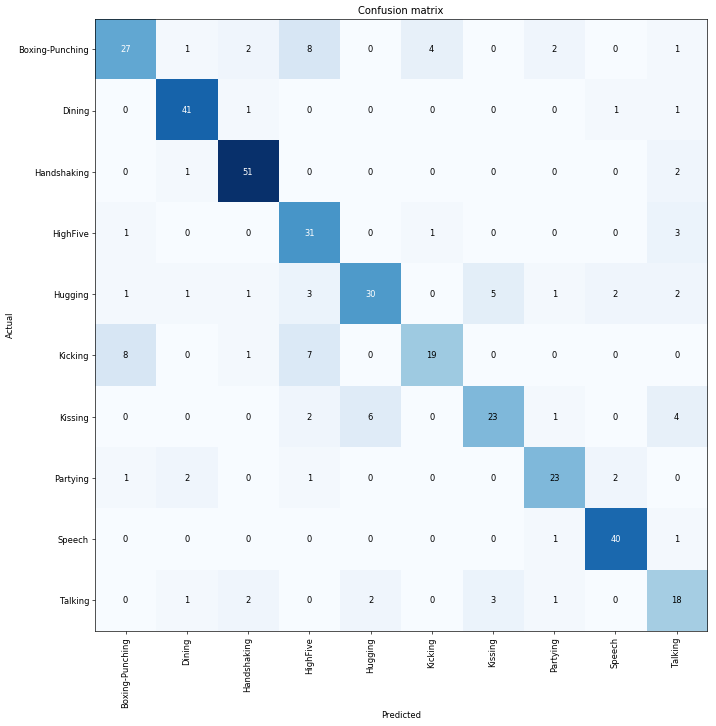

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.most_confused(min_val=2)

[('Boxing-Punching', 'HighFive', 8),
 ('Kicking', 'Boxing-Punching', 8),
 ('Kicking', 'HighFive', 7),
 ('Kissing', 'Hugging', 6),
 ('Hugging', 'Kissing', 5),
 ('Boxing-Punching', 'Kicking', 4),
 ('Kissing', 'Talking', 4),
 ('HighFive', 'Talking', 3),
 ('Hugging', 'HighFive', 3),
 ('Talking', 'Kissing', 3),
 ('Boxing-Punching', 'Handshaking', 2),
 ('Boxing-Punching', 'Partying', 2),
 ('Handshaking', 'Talking', 2),
 ('Hugging', 'Speech', 2),
 ('Hugging', 'Talking', 2),
 ('Kissing', 'HighFive', 2),
 ('Partying', 'Dining', 2),
 ('Partying', 'Speech', 2),
 ('Talking', 'Handshaking', 2),
 ('Talking', 'Hugging', 2)]

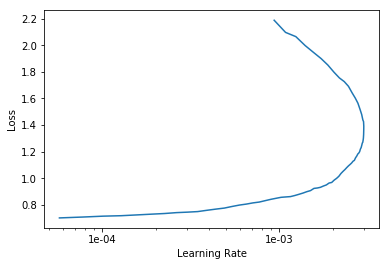

In [32]:
learn.recorder.plot()

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.588896,0.861631,0.248731,00:16


In [35]:
learn.load('test-1')

Learner(data=ImageDataBunch;

Train: LabelList (1578 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kissing,Kissing,Kissing,Kissing,Kissing
Path: ../../datasets;

Valid: LabelList (394 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Partying,Partying,Handshaking,Hugging,Talking
Path: ../../datasets;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


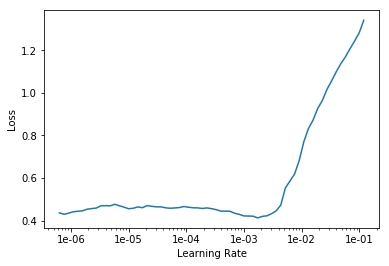

In [37]:
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.319568,0.585032,0.192893,00:16
1,0.306865,0.525461,0.180203,00:15
2,0.259732,0.511496,0.170051,00:15
3,0.208479,0.509739,0.172589,00:16


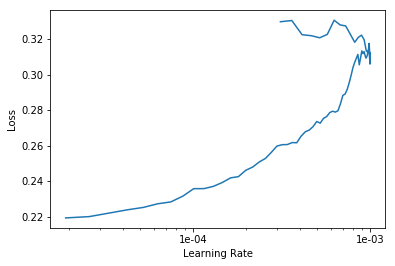

In [40]:
learn.recorder.plot()

In [46]:
data = ImageDataBunch.from_folder(path, fnames, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

/home/stan_demontmarin/.conda/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/home/stan_demontmarin/.conda/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


IndexError: index 0 is out of bounds for axis 0 with size 0